In [1]:
from pyhdf.SD import SD, SDC
import os

file_path = os.path.join("data", "MOD16A3GF.A2000001.h28v04.061.2020264071721.hdf")
hdf = SD(file_path, SDC.READ)

# Print dataset names with their info
datasets = hdf.datasets()
for name, info in datasets.items():
    print(name, info)



ET_500m (('YDim:MOD_Grid_MOD16A3', 'XDim:MOD_Grid_MOD16A3'), (2400, 2400), 23, 0)
LE_500m (('YDim:MOD_Grid_MOD16A3', 'XDim:MOD_Grid_MOD16A3'), (2400, 2400), 22, 1)
PET_500m (('YDim:MOD_Grid_MOD16A3', 'XDim:MOD_Grid_MOD16A3'), (2400, 2400), 23, 2)
PLE_500m (('YDim:MOD_Grid_MOD16A3', 'XDim:MOD_Grid_MOD16A3'), (2400, 2400), 22, 3)
ET_QC_500m (('YDim:MOD_Grid_MOD16A3', 'XDim:MOD_Grid_MOD16A3'), (2400, 2400), 21, 4)


In [2]:
et_data = hdf.select('ET_500m')[:]
print(et_data.shape)


(2400, 2400)


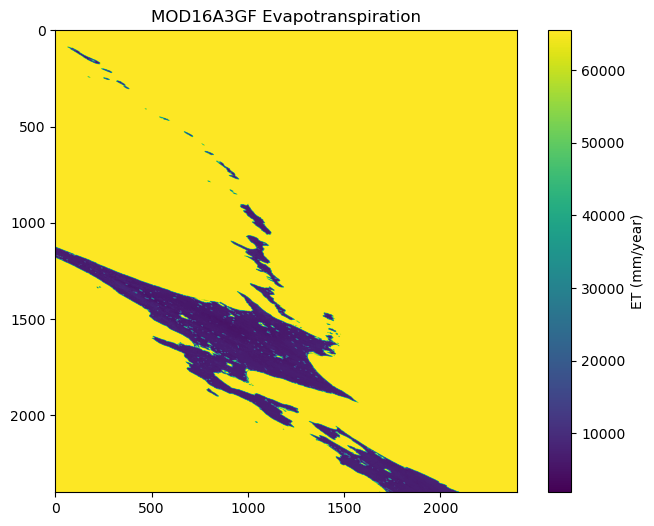

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# et_data is your NumPy array from the HDF file
plt.figure(figsize=(8,6))
plt.imshow(et_data, cmap='viridis')
plt.colorbar(label='ET (mm/year)')  # Add correct units
plt.title('MOD16A3GF Evapotranspiration')
plt.show()


In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Example: Create a circular bounding area around a point
def create_circle_bounding_box(center_lat, center_lon, radius_meters):
    """
    Create a circular bounding area (buffer) around a given lat/lon point.
    
    Args:
        center_lat (float): Latitude of the center point.
        center_lon (float): Longitude of the center point.
        radius_meters (float): Radius of the circle in meters.
    
    Returns:
        GeoSeries: A GeoSeries containing the circular polygon.
    """
    # Create a GeoSeries with the point in WGS84 (EPSG:4326)
    point = gpd.GeoSeries([Point(center_lon, center_lat)], crs="EPSG:4326")
    
    # Project to a local metric CRS for accurate distance buffering
    point_projected = point.to_crs(epsg=3857)  # Web Mercator (meters)
    
    # Create buffer (circle) in meters
    circle = point_projected.buffer(radius_meters)
    
    # Convert back to WGS84 for mapping
    circle_wgs84 = circle.to_crs(epsg=4326)
    
    return circle_wgs84




# Example usage
center_lat = 34.0522   # Example: Los Angeles
center_lon = -118.2437
radius_meters = 5000   # 5 km

circle_geom = create_circle_bounding_box(center_lat, center_lon, radius_meters)

# Plot the circle
fig, ax = plt.subplots()
circle_geom.plot(ax=ax, color='lightblue', edgecolor='blue', alpha=0.5)
gpd.GeoSeries([Point(center_lon, center_lat)], crs="EPSG:4326").plot(ax=ax, color='red')
plt.title("Circular Bounding Area")
plt.show()
